## EDA: Movielens Dataset (Stratified Sample)

First of all we import the needed libraries.

In [1]:
# import the needed libraries for the EDA
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


We read the cleaned file for the Movielens

In [2]:
# we read the Movielens cleaned data
# we set the directory to the cleaned folder
os.listdir(os.path.join('.', 'cleaned'))

['final_sample30_parquet',
 'final_sample50_parquet',
 'final_sample5_parquet',
 'final_strat_sample_parquet',
 'movielens_parquet',
 'movielens_parquet_small',
 'netflix_parquet',
 'sample_tenth_netflix',
 'strat_sample_movielens',
 'strat_sample_netflix']

After importing the needed libraries, we will start looking at the content of the Movielens

We import the Stratified sample.

In [3]:
# Extracting sample
sample_strat = pd.read_parquet('cleaned/strat_sample_movielens')

First of all we look into the shape and size of the data, to see how many different movies we have.

In [4]:
# we check the columns of the dataframe
print(sample_strat.columns)

Index(['movieId', 'review_data', 'genres', 'year', 'title', 'review_stratum',
       'num_reviews'],
      dtype='object')


We do a basic description of the numerical variables that we have in the dataset.

In [5]:
# We describe the dataframe
sample_strat.describe()

,movieId,num_reviews
count,500.000000,500.000000
mean,120314.306000,100.762000
std,79948.009138,469.999102
min,75.000000,1.000000
25%,48684.750000,2.000000
50%,128582.000000,3.000000
75%,183808.500000,12.000000
max,286031.000000,5328.000000


We have to check if there are NaN values, and if their presence is relevant and means a big part of the dataset.

In [6]:
# We check if there are NaN values in the dataframe where we print the percentages of NaN values
def check_nan(df):
    nan_values = df.isna().sum()
    nan_values = nan_values[nan_values > 0]
    nan_values = nan_values / len(df)
    print(nan_values)

check_nan(sample_strat)

year    0.004
dtype: float64


In [7]:
# We print the content of the dataframe
sample_strat.head()

,movieId,review_data,genres,year,title,review_stratum,num_reviews
27145,143367,"[{'date': 2022-05-01, 'rating': 3.5, 'userId':...","[Drama, Thriller]",2016,Silence,Q5,162
10850,47830,"[{'date': 2017-07-26, 'rating': 3.5, 'userId':...","[Crime, Drama, Mystery, Thriller]",2005,"Quiet, The",Q5,26
6219,6375,"[{'date': 2005-02-08, 'rating': 4.5, 'userId':...",[Documentary],2002,Gigantic (A Tale of Two Johns),Q5,25
7400,7786,"[{'date': 2005-03-22, 'rating': 2.5, 'userId':...",[Documentary],1999,Genghis Blues,Q5,21
2756,2857,"[{'date': 2008-10-31, 'rating': 4.0, 'userId':...","[Adventure, Animation, Comedy, Fantasy, Musical]",1968,Yellow Submarine,Q5,628


In [8]:
# We print the type of the columns
print(sample_strat.dtypes)

movieId              int64
review_data         object
genres              object
year                object
title               object
review_stratum    category
num_reviews          int64
dtype: object


We will explode the genres, to see how many unique ones we have.

In [9]:
# Explode the lists in the 'genres' column into separate rows
exploded_genres = sample_strat.explode('genres')['genres']

# Get unique genres
unique_genres = exploded_genres.unique()

# Print unique genres
print(unique_genres)


['Drama' 'Thriller' 'Crime' 'Mystery' 'Documentary' 'Adventure'
 'Animation' 'Comedy' 'Fantasy' 'Musical' 'Romance' 'Sci-Fi' 'Children'
 'Action' 'Horror' 'War' 'IMAX' 'Western' '(no genres listed)']


We plot the distribution of the genres using `count plots` for the Stratified Sample.

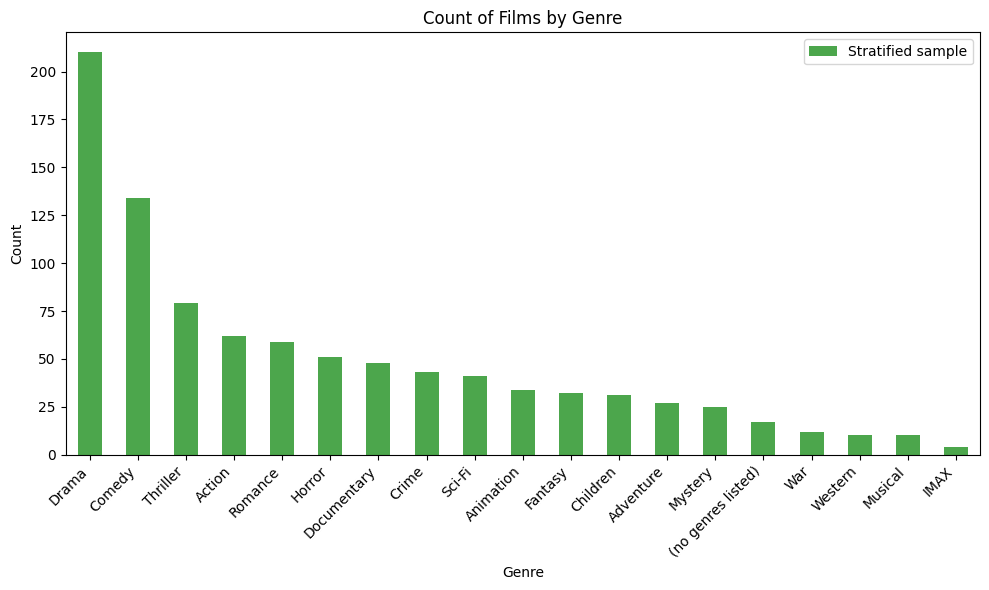

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list to hold all genres for strat sample
all_genres_sample = []

# Iterate through each row of the DataFrame and append each genre to the list
for genres_list in sample_strat['genres']:
    all_genres_sample.extend(genres_list)

# Create a pandas Series from the list of all genres and count occurrences of each genre
genre_counts = pd.Series(all_genres_sample).value_counts()

# Plotting the count of each genre for the Stratified Sample
plt.figure(figsize=(10, 6))

# Plotting sample
genre_counts.plot(kind='bar', color='green', alpha=0.7, label='Stratified sample')

plt.title('Count of Films by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


We see that for the different Stratified Sample, the distribution of the genres follow the same patterns and are present in the same ammounts.

We will repeat a similar process for the years the movies where released on for each sample. 

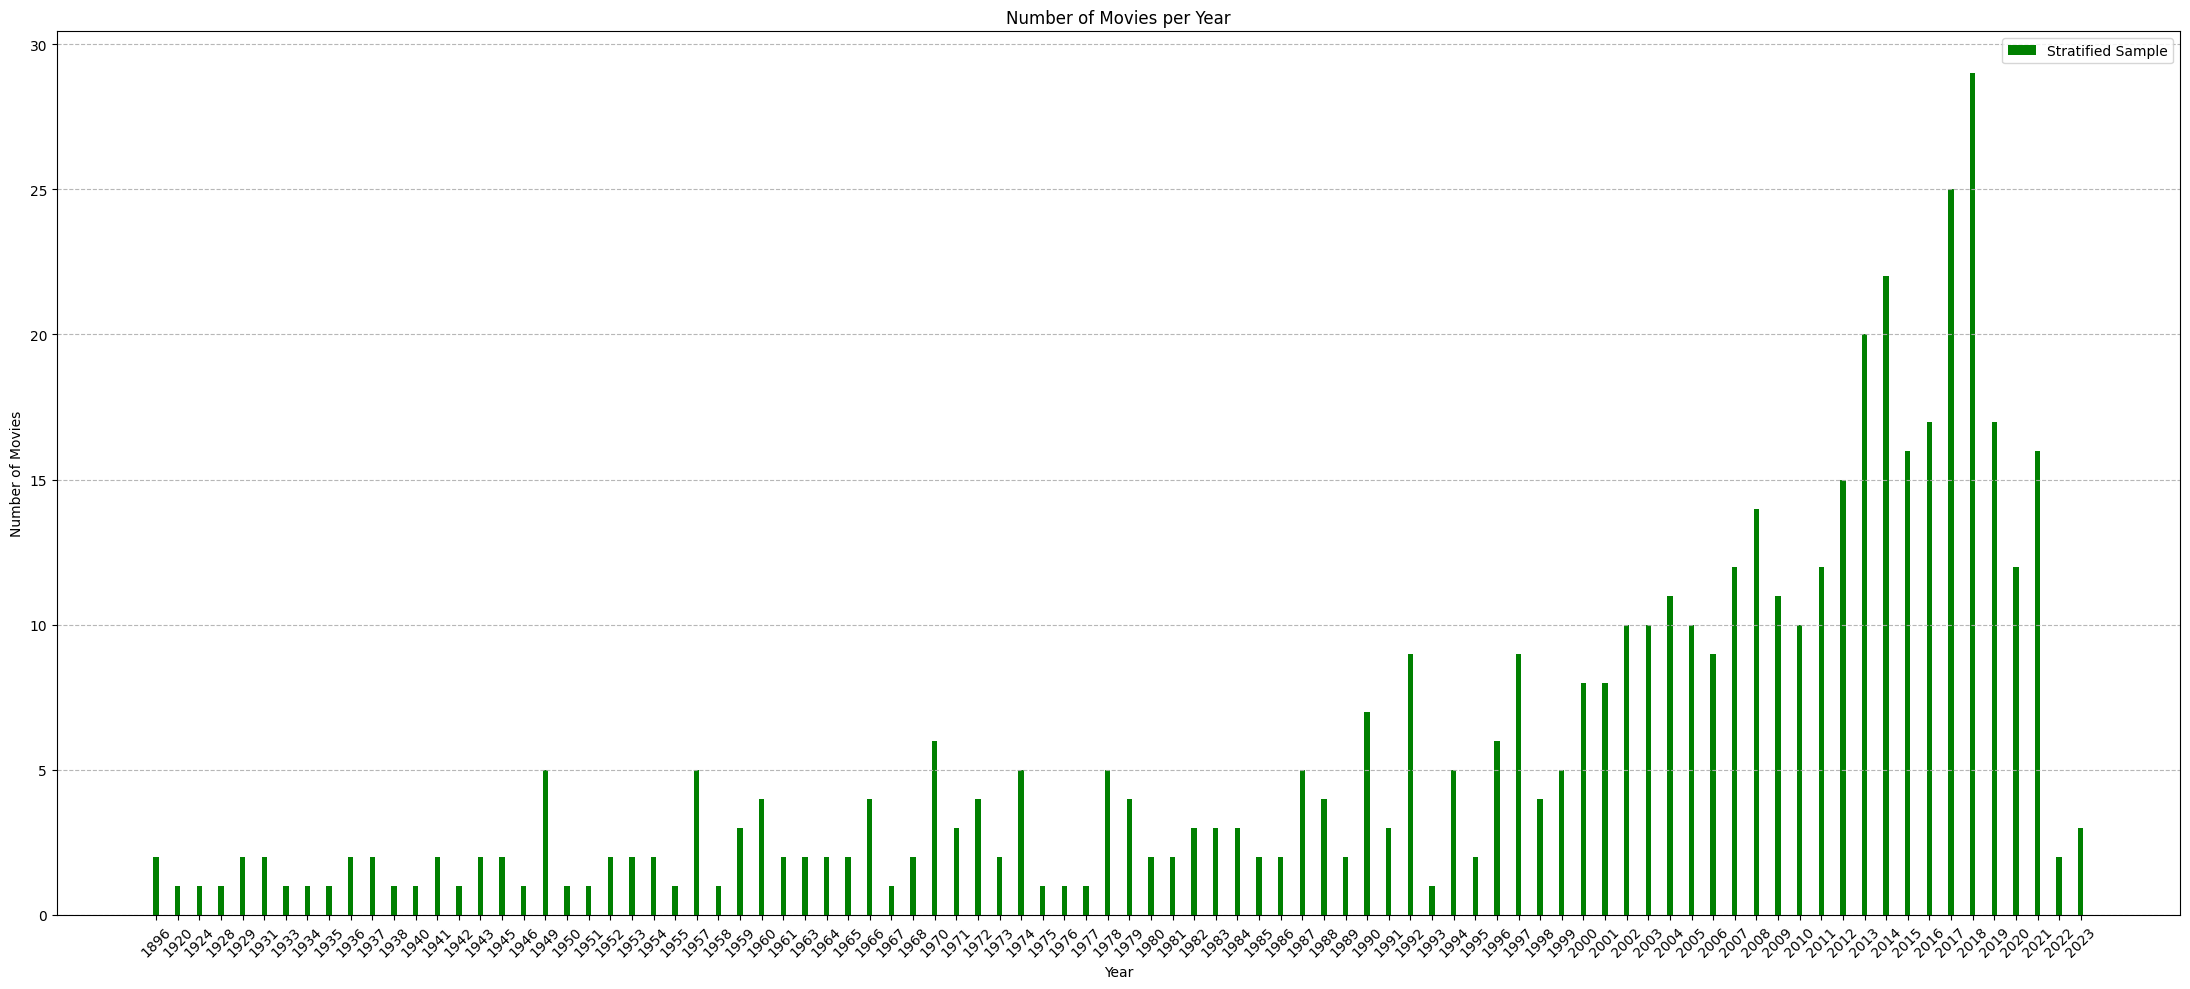

In [11]:
# Counting the number of movies per year of the sample
movies_per_year = sample_strat['year'].value_counts().sort_index()

# Get the union of all years in the sample
all_years = sorted(set(movies_per_year.index))

# Plotting the count of movies per year for the sample
plt.figure(figsize=(22, 10))
bar_width = 0.25  # Adjust the width of each bar

# Plotting for sample
plt.bar([x + bar_width for x in range(len(all_years))], [movies_per_year.get(year, 0) for year in all_years], 
        color='green', width=bar_width, align='center', label='Stratified Sample')

plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Adjust x-ticks positions and labels
plt.xticks([x + bar_width for x in range(len(all_years))], all_years, rotation=45)

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()


The Stratified Sample follows similar patterns as the distribution of the complete dataset seen in `EDA Movielens - Full file.ipynb`. 

We also have to look into the `review_data`, each movie that is in the dataframe has all the reviews that have been done about them in the column `review_data`.

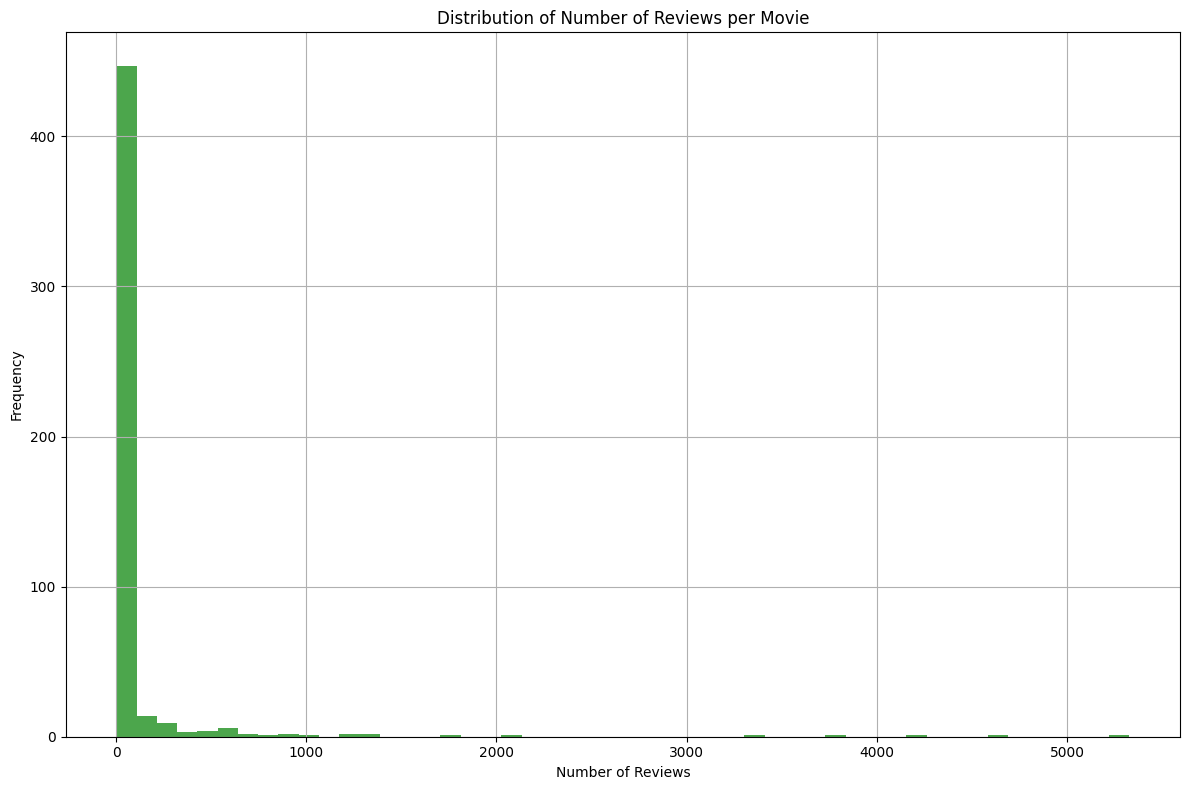

In [12]:
import matplotlib.pyplot as plt

# Calculate the number of reviews per movie for sample
reviews_per_movie = [len(review_list) for review_list in sample_strat['review_data']]

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 8))

# Plotting the distribution of the number of reviews per movie for sample
axes.hist(reviews_per_movie, bins=50, color='green', alpha=0.7)
axes.set_title('Distribution of Number of Reviews per Movie')
axes.set_xlabel('Number of Reviews')
axes.set_ylabel('Frequency')
axes.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


We are going to check what movies are the most reviewed ones.

In [13]:
import pandas as pd

# Define a function to calculate top movies with most reviews
def calculate_top_movies(sample):
    # Create an empty list to store dictionaries
    movie_reviews_data = []

    # Iterate through each row of the DataFrame and append the movieId, title, and number of reviews to the list
    for index, row in sample.iterrows():
        movie_reviews_data.append({'movieId': row['movieId'], 'title': row['title'], 'num_reviews': len(row['review_data'])})

    # Convert the list of dictionaries into a DataFrame
    movie_reviews = pd.DataFrame(movie_reviews_data)

    # Sort the DataFrame by the number of reviews in descending order
    movie_reviews = movie_reviews.sort_values(by='num_reviews', ascending=False)

    # Get the top 10 movies with the most reviews
    top_10_movies = movie_reviews.head(10)

    return top_10_movies

# Calculate top 10 movies with most reviews for the sample
top_10_movies_sample = calculate_top_movies(sample_strat)
print("Top 10 movies with most reviews for the stratified sample:")
print(top_10_movies_sample)


Top 10 movies with most reviews for the stratified sample:
    movieId                       title  num_reviews
65     1221    Godfather: Part II, The          5328
70      733                  Rock, The          4590
17    48516              Departed, The          4190
24      208                 Waterworld          3747
35    89745              Avengers, The          3326
29     3081              Sleepy Hollow          2084
95    47099  Pursuit of Happyness, The          1765
49     3252           Scent of a Woman          1372
38    61323         Burn After Reading          1329
22    68319   X-Men Origins: Wolverine          1257


The number of reviews for the top movies is similar to the full 100k file.

We will plot the number of times each rating has been given to the movies to have an overview of the tendencies of the users when rating, like we did for the full file.

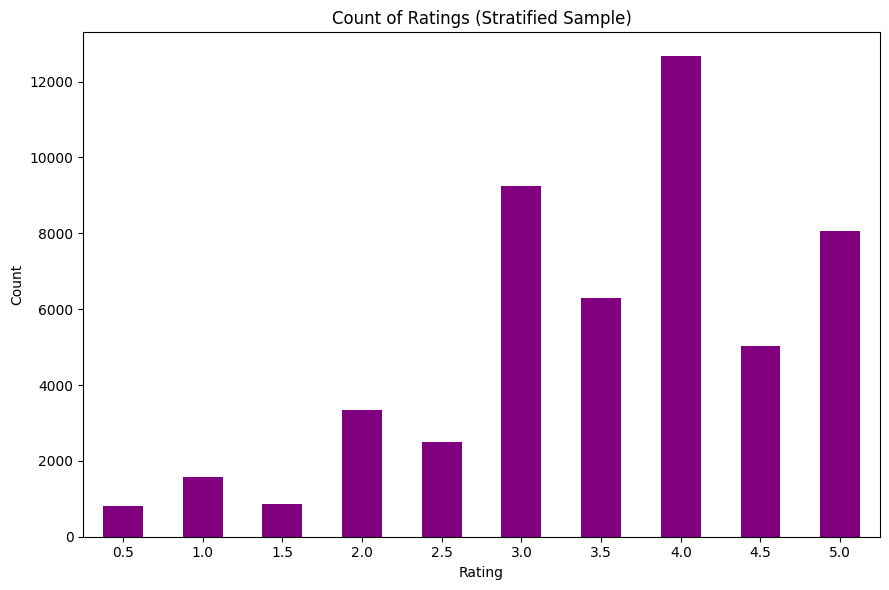

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to plot rating counts in subplots
def plot_rating_counts(sample, subplot_location, title):
    # Create a list to hold all ratings
    all_ratings = []

    # Iterate through each row of the DataFrame and append each rating to the list
    for reviews_list in sample['review_data']:
        for review in reviews_list:
            all_ratings.append(review['rating'])
            
    # Create a pandas Series from the list of all ratings and count occurrences of each rating
    rating_counts = pd.Series(all_ratings).value_counts().sort_index()

    # Plotting the count of each rating
    plt.subplot(subplot_location)
    rating_counts.plot(kind='bar', color='purple')
    plt.title(f'Count of Ratings ({title})')  # Set subplot title
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()

# Create subplots
plt.figure(figsize=(9, 6))

# Plot rating counts for sample
plot_rating_counts(sample_strat, 111, 'Stratified Sample')

# Show the plot
plt.show()


These three graphs stay very truthful to the full file, all of them follow the same distribution.

Now we will plot the years and months the reviews were created in the Stratified Sample, showing in bar charts the number of reviews per year, and in the bars itself the number of reviews per month.

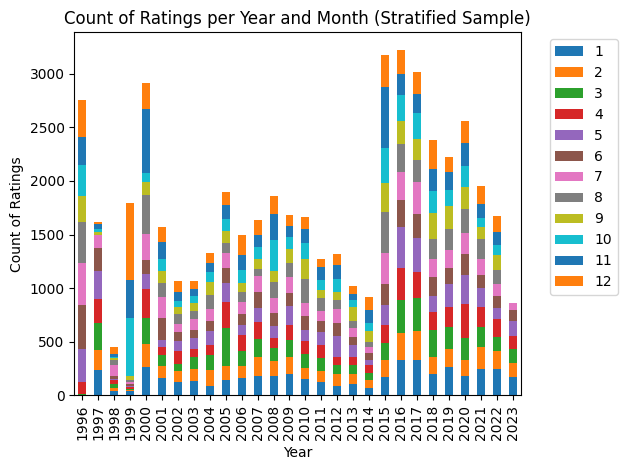

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to plot ratings per year and month
def plot_ratings_per_year_month(sample, title):
    # Create lists to hold all years and months
    all_years = []
    all_months = []

    # Iterate through each row of the DataFrame and extract year and month from the 'date' key of each dictionary
    for reviews_list in sample['review_data']:
        for review in reviews_list:
            if review['date'] is not None:  # Check if 'date' is not None
                year_month = review['date'].strftime('%Y-%m')
                year, month = year_month.split('-')
                all_years.append(int(year))
                all_months.append(int(month))

    # Create a pandas DataFrame from the lists of years and months
    ratings_per_year_month = pd.DataFrame({'Year': all_years, 'Month': all_months})

    # Plotting the count of ratings per year and month
    ratings_per_year_month.groupby(['Year', 'Month']).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Count of Ratings per Year and Month ({title})')
    plt.xlabel('Year')
    plt.ylabel('Count of Ratings')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjusting legend position

# Plot ratings per year and month for the sample
plot_ratings_per_year_month(sample_strat, 'Stratified Sample')

# Show the plot
plt.tight_layout()
plt.show()


We are going to check for the highest rated films in the Stratified Sample. First of all, we are going to check the top 10 highest rated films.

In [16]:
# Define a function to calculate the average rating for each movie
def calculate_average_rating(sample):
    # Create an empty dictionary to store movie ratings
    movie_ratings = {}

    # Iterate through each row of the DataFrame and calculate the average rating for each movie
    for index, row in sample.iterrows():
        movie_id = row['movieId']
        # Filter out None values from ratings
        ratings = [review['rating'] for review in row['review_data'] if review['rating'] is not None]
        # Calculate average rating if there are ratings present
        if ratings:
            average_rating = sum(ratings) / len(ratings)
            movie_ratings[movie_id] = average_rating

    # Sort the movies based on their average ratings in descending order
    sorted_movies = sorted(movie_ratings.items(), key=lambda x: x[1], reverse=True)

    # Return the sorted movies with titles
    sorted_movies_with_titles = [(sample[sample['movieId'] == movie_id]['title'].iloc[0], rating) for movie_id, rating in sorted_movies]

    return sorted_movies_with_titles

# Calculate the average ratings for the sample
sorted_movies_percent = calculate_average_rating(sample_strat)

# Print the top 10 highest-rated films in the sample
print("Top 10 highest-rated films in the stratified sample:")
for movie_title, rating in sorted_movies_percent[:10]:
    print(f"{movie_title}: {rating:.2f}")


Top 10 highest-rated films in the stratified sample:
From All of Us to All of You : 5.00
Hybrid : 5.00
Alien Planet : 5.00
Adrenaline : 5.00
The Kingmaker : 5.00
The Worst Witch : 5.00
Christmas in the Rockies : 5.00
Bang! : 5.00
Monster High: Great Scarrier Reef : 5.00
The Bonus : 5.00


## Feature Engeneering

For the feature engeneering part we will only do the unpacking of the reviews dictionaries, because as they are, it is going to be very difficult to use the reviews if we don't do so, and also, we will also `One-Hot-Encode` the genres to have them in separate columns.

We will do an unpacking of the dictionaries created in the `joining.ipynb` notebook. We end up selecting 5% as a good sampling of the original dataframe.

We find convenient to encode the genres since we have them in a list in the same column, we will `one-hot-encode` the genres to have 0s and 1s for each genre depending on if the movie has them or not. This will be potentially helpful for the modelling part, if we decide to take into account the genres for the modelling.

In [17]:
# We will unpack the data in the review_data column
# We will create a new dataframe with the unpacked data
# We will also add the movieId and title to the new dataframe
# We will also add the year to the new dataframe
# We will also add the genres to the new dataframe

# Create an empty list to store dictionaries
unpacked_reviews_data = []

# Iterate through each row of the DataFrame and unpack the review_data
for index, row in sample_strat.iterrows():
    for review in row['review_data']:
        unpacked_reviews_data.append({'movieId': row['movieId'], 'title': row['title'], 'year': row['year'], 'genres': row['genres'], 'userId': review['userId'], 'rating': review['rating'], 'date': review['date']})

# Convert the list of dictionaries into a DataFrame
unpacked_reviews_df = pd.DataFrame(unpacked_reviews_data)

# Print the first few rows of the DataFrame
unpacked_reviews_df.head()



,movieId,title,year,genres,userId,rating,date
0,143367,Silence,2016,"[Drama, Thriller]",267711,3.5,2022-05-01
1,143367,Silence,2016,"[Drama, Thriller]",9138,4.5,2021-08-18
2,143367,Silence,2016,"[Drama, Thriller]",9138,4.5,2021-08-18
3,143367,Silence,2016,"[Drama, Thriller]",306765,3.5,2017-11-06
4,143367,Silence,2016,"[Drama, Thriller]",318227,2.5,2019-05-03


In [18]:
# Create new columns for each unique genre
unique_genres = unpacked_reviews_df['genres'].explode().unique()

for genre in unique_genres:
    unpacked_reviews_df[genre] = unpacked_reviews_df['genres'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'genres' column
unpacked_reviews_df = unpacked_reviews_df.drop(columns=['genres'])

# Print the updated DataFrame
print(unpacked_reviews_df.head())

   movieId     title  year  userId  rating        date  Drama  Thriller  \
0   143367  Silence   2016  267711     3.5  2022-05-01      1         1   
1   143367  Silence   2016    9138     4.5  2021-08-18      1         1   
2   143367  Silence   2016    9138     4.5  2021-08-18      1         1   
3   143367  Silence   2016  306765     3.5  2017-11-06      1         1   
4   143367  Silence   2016  318227     2.5  2019-05-03      1         1   

   Crime  Mystery  ...  Musical  Romance  Sci-Fi  Children  Action  Horror  \
0      0        0  ...        0        0       0         0       0       0   
1      0        0  ...        0        0       0         0       0       0   
2      0        0  ...        0        0       0         0       0       0   
3      0        0  ...        0        0       0         0       0       0   
4      0        0  ...        0        0       0         0       0       0   

   War  IMAX  Western  (no genres listed)  
0    0     0        0               

This final versions dataframes are the ones we are going to use for modelling since, as observed in this file, they follow the same distributions than the original file but it are less heavy memory-wise. We will export the files as a parquet for memory purposes aswell.

In [19]:
# We export the files as a parquet file
unpacked_reviews_df.to_parquet('cleaned/final_strat_sample_parquet')